In [74]:
#Esto se hace para que el notebook pueda acceder a rutas por encima de el
import os 
import sys 

rooth_path = os.path.abspath("..")
sys.path.append(rooth_path)

In [75]:
import pandas as pd
from src.config import ubicacion_datos_crudos_extraidos
df = pd.read_csv(f"../{ubicacion_datos_crudos_extraidos}")

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262200 entries, 0 to 262199
Data columns (total 7 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   org:resource          244190 non-null  float64
 1   lifecycle:transition  262200 non-null  object 
 2   concept:name          262200 non-null  object 
 3   time:timestamp        262200 non-null  object 
 4   case:REG_DATE         262200 non-null  object 
 5   case:concept:name     262200 non-null  int64  
 6   case:AMOUNT_REQ       262200 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 14.0+ MB


In [77]:
df.head()

,org:resource,lifecycle:transition,concept:name,time:timestamp,case:REG_DATE,case:concept:name,case:AMOUNT_REQ
0,112.0,COMPLETE,A_SUBMITTED,2011-10-01 00:38:44.546000+00:00,2011-10-01 00:38:44.546000+00:00,173688,20000
1,112.0,COMPLETE,A_PARTLYSUBMITTED,2011-10-01 00:38:44.880000+00:00,2011-10-01 00:38:44.546000+00:00,173688,20000
2,112.0,COMPLETE,A_PREACCEPTED,2011-10-01 00:39:37.906000+00:00,2011-10-01 00:38:44.546000+00:00,173688,20000
3,112.0,SCHEDULE,W_Completeren aanvraag,2011-10-01 00:39:38.875000+00:00,2011-10-01 00:38:44.546000+00:00,173688,20000
4,NaN,START,W_Completeren aanvraag,2011-10-01 11:36:46.437000+00:00,2011-10-01 00:38:44.546000+00:00,173688,20000


In [78]:
df = df.drop("org:resource", axis=1) #No nos interesa quien fue el colaborador que hizo el proceso 
df = df.drop("lifecycle:transition", axis= 1) #No nos el ciclo en el que se encuentra un credito
df = df.drop("case:REG_DATE", axis=1) #Esta columna esta duplicada

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262200 entries, 0 to 262199
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   concept:name       262200 non-null  object
 1   time:timestamp     262200 non-null  object
 2   case:concept:name  262200 non-null  int64 
 3   case:AMOUNT_REQ    262200 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 8.0+ MB


In [80]:
df.columns = ["Actividad","Fecha y hora de la actividad","ID de la solicitud","Monto de la solicitud"]

In [81]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262200 entries, 0 to 262199
Data columns (total 4 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   Actividad                     262200 non-null  object
 1   Fecha y hora de la actividad  262200 non-null  object
 2   ID de la solicitud            262200 non-null  int64 
 3   Monto de la solicitud         262200 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 8.0+ MB


,Actividad,Fecha y hora de la actividad,ID de la solicitud,Monto de la solicitud
0,A_SUBMITTED,2011-10-01 00:38:44.546000+00:00,173688,20000
1,A_PARTLYSUBMITTED,2011-10-01 00:38:44.880000+00:00,173688,20000
2,A_PREACCEPTED,2011-10-01 00:39:37.906000+00:00,173688,20000
3,W_Completeren aanvraag,2011-10-01 00:39:38.875000+00:00,173688,20000
4,W_Completeren aanvraag,2011-10-01 11:36:46.437000+00:00,173688,20000


In [82]:
values = df["Actividad"].unique() #Miramos cuales son todas las posibles actividades por las que puede pasar una solicitud de credito
print(values)

['A_SUBMITTED' 'A_PARTLYSUBMITTED' 'A_PREACCEPTED'
 'W_Completeren aanvraag' 'A_ACCEPTED' 'O_SELECTED' 'A_FINALIZED'
 'O_CREATED' 'O_SENT' 'W_Nabellen offertes' 'O_SENT_BACK'
 'W_Valideren aanvraag' 'A_REGISTERED' 'A_APPROVED' 'O_ACCEPTED'
 'A_ACTIVATED' 'O_CANCELLED' 'W_Wijzigen contractgegevens' 'A_DECLINED'
 'A_CANCELLED' 'W_Afhandelen leads' 'O_DECLINED'
 'W_Nabellen incomplete dossiers' 'W_Beoordelen fraude']


In [83]:
#Esos posibles valores que puede tomar la actividad los mapearemos hacia estos nuevos valores, en un diccionario [value:key]
keys = [
    "Cliente envía la solicitud completa al banco",
    "Cliente envía la solicitud incompleta al banco",
    "Banco marca la solicitud como pre-aprobada",
    "Banco o cliente completa información faltante de la solicitud",
    "Cliente acepta formalmente continuar con la solicitud",
    "Cliente selecciona una de las ofertas de crédito",
    "Banco cierra administrativamente el caso",
    "Banco crea una oferta de crédito para el cliente",
    "Banco envía la oferta de crédito al cliente",
    "Banco realiza seguimiento telefónico de la oferta",
    "Cliente devuelve la oferta para revisión o cambios",
    "Banco valida y revisa la información de la solicitud",
    "Banco registra el crédito aprobado en el sistema",
    "Banco aprueba internamente el crédito",
    "Cliente acepta la oferta de crédito",
    "Banco activa el crédito y lo deja operativo",
    "Banco cancela la oferta de crédito",
    "Banco modifica manualmente los datos del contrato",
    "Banco rechaza la solicitud de crédito",
    "Cliente cancela voluntariamente la solicitud",
    "Banco realiza gestión comercial inicial del cliente",
    "Cliente rechaza la oferta de crédito",
    "Banco contacta al cliente por documentación incompleta",
    "Banco evalúa la solicitud por posible fraude"
]

In [84]:
def mapeado():
    diccionario_mapeado = dict(zip(values,keys)) #Creamos el diccionario donde el value es la actividad que no se entiende a que hace referencia y la key es su correspondiente valor que si se entiende a que hace referencia
    df["Actividad"] = df["Actividad"].map(diccionario_mapeado).astype(object) #.map nos pide un diccionario, diccionario que se hizo arriba llamado diccionario_mapeado

mapeado()

In [85]:
df.head(30)

,Actividad,Fecha y hora de la actividad,ID de la solicitud,Monto de la solicitud
0,Cliente envía la solicitud completa al banco,2011-10-01 00:38:44.546000+00:00,173688,20000
1,Cliente envía la solicitud incompleta al banco,2011-10-01 00:38:44.880000+00:00,173688,20000
2,Banco marca la solicitud como pre-aprobada,2011-10-01 00:39:37.906000+00:00,173688,20000
3,Banco o cliente completa información faltante ...,2011-10-01 00:39:38.875000+00:00,173688,20000
4,Banco o cliente completa información faltante ...,2011-10-01 11:36:46.437000+00:00,173688,20000
5,Cliente acepta formalmente continuar con la so...,2011-10-01 11:42:43.308000+00:00,173688,20000
6,Cliente selecciona una de las ofertas de crédito,2011-10-01 11:45:09.243000+00:00,173688,20000
7,Banco cierra administrativamente el caso,2011-10-01 11:45:09.243000+00:00,173688,20000
8,Banco crea una oferta de crédito para el cliente,2011-10-01 11:45:11.197000+00:00,173688,20000
9,Banco envía la oferta de crédito al cliente,2011-10-01 11:45:11.380000+00:00,173688,20000


In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

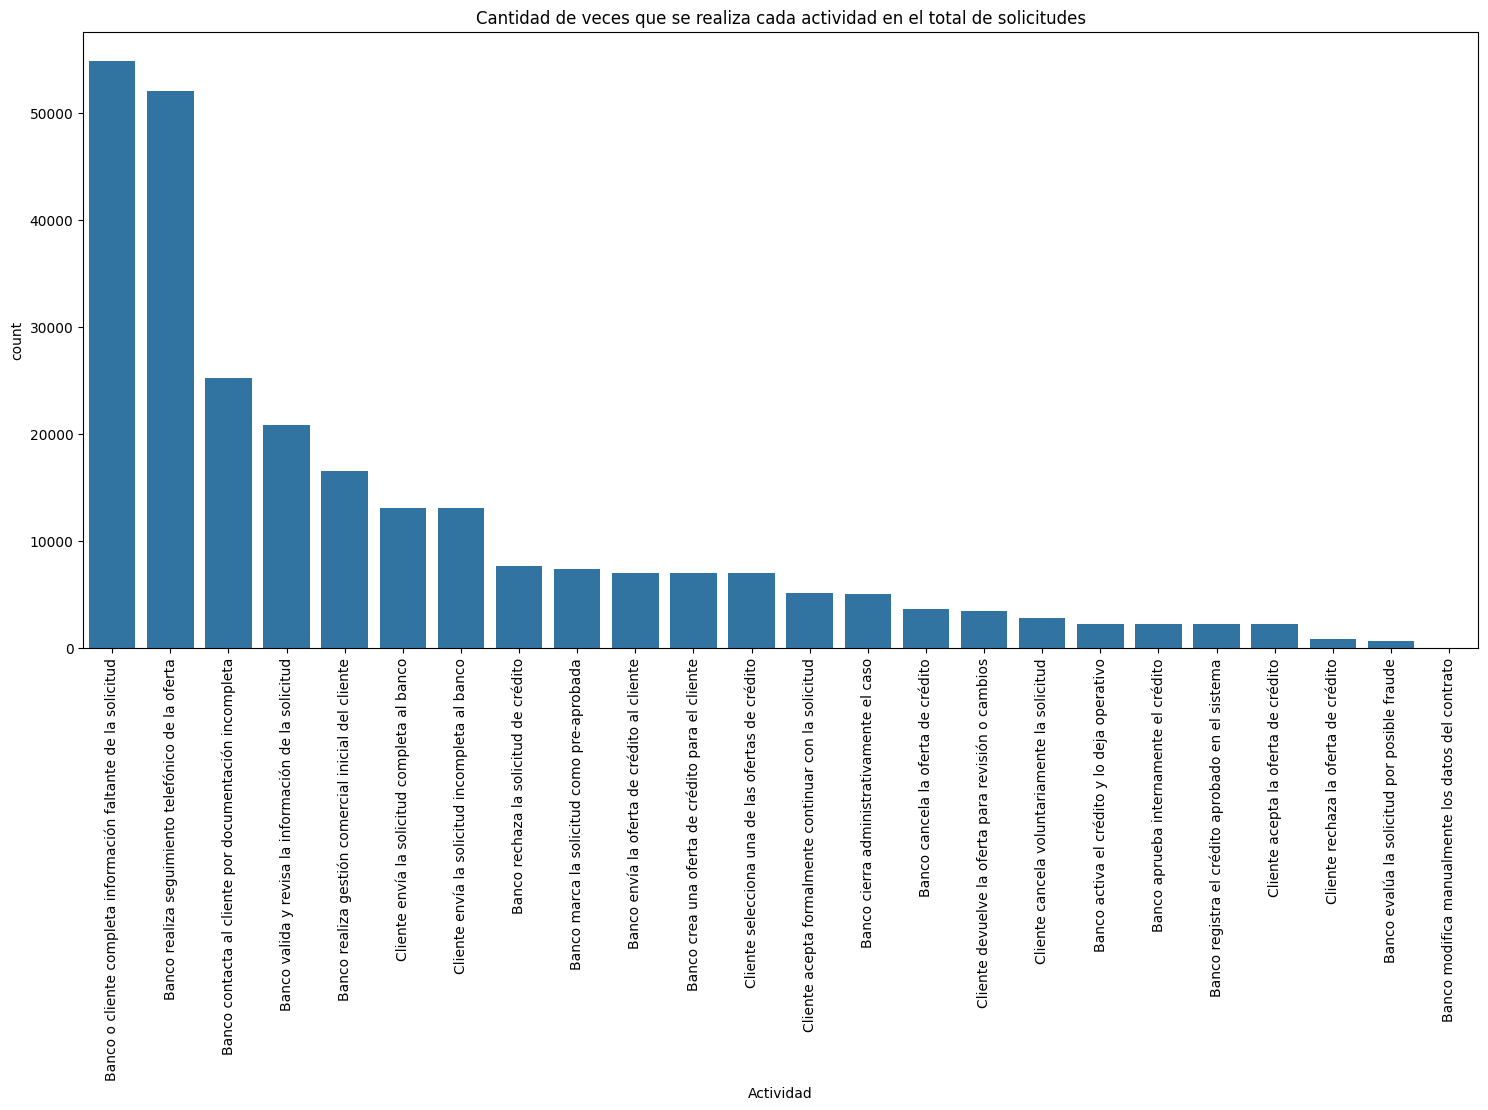

In [87]:
plt.figure(figsize=(18,8))
sns.countplot(data=df, x="Actividad",order=df["Actividad"].value_counts().index)
plt.title("Cantidad de veces que se realiza cada actividad en el total de solicitudes")
plt.xticks(rotation=90) #Me rota el nombre de cada barra 90 grados
plt.show()

In [88]:
solicitudes = list(df.groupby("ID de la solicitud")["Actividad"]) #Ahora creamos una lista que almacene el proceso que sigue cada una de las solicitudes

In [95]:

print((solicitudes[0])) #Miremos todo el proceso que siguió la primera solicitud

(173688, 0          Cliente envía la solicitud completa al banco
1        Cliente envía la solicitud incompleta al banco
2            Banco marca la solicitud como pre-aprobada
3     Banco o cliente completa información faltante ...
4     Banco o cliente completa información faltante ...
5     Cliente acepta formalmente continuar con la so...
6      Cliente selecciona una de las ofertas de crédito
7              Banco cierra administrativamente el caso
8      Banco crea una oferta de crédito para el cliente
9           Banco envía la oferta de crédito al cliente
10    Banco realiza seguimiento telefónico de la oferta
11    Banco o cliente completa información faltante ...
12    Banco realiza seguimiento telefónico de la oferta
13    Banco realiza seguimiento telefónico de la oferta
14    Banco realiza seguimiento telefónico de la oferta
15    Banco realiza seguimiento telefónico de la oferta
16    Banco realiza seguimiento telefónico de la oferta
17    Cliente devuelve la oferta para r

In [ ]:
#Ahora necesitamos hacer una lista de tuplas, ya que esto es lo que recibe efficient-apriori
solicitudes_tuplas = [
    (n,*s) for n,s in solicitudes # *s sirve para desempaquetar s que es una series 
]

In [105]:
print(solicitudes_tuplas[0][1])

Cliente envía la solicitud completa al banco


In [127]:
from efficient_apriori import apriori

conjuntos, reglas = apriori(solicitudes_tuplas,min_support=0.5,min_confidence=0.2)
reglas = filter(lambda regla: len(regla.lhs) == 1, reglas)


for reglas in sorted(reglas, key=lambda regla: regla.lift):
  print(reglas)  # Prints the rule and its confidence, support, lift, .

{Cliente envía la solicitud completa al banco} -> {Banco marca la solicitud como pre-aprobada} (conf: 0.667, supp: 0.667, lift: 1.000, conv: 1.000)
{Banco marca la solicitud como pre-aprobada} -> {Cliente envía la solicitud completa al banco} (conf: 1.000, supp: 0.667, lift: 1.000, conv: 0.000)
{Cliente envía la solicitud incompleta al banco} -> {Banco marca la solicitud como pre-aprobada} (conf: 0.667, supp: 0.667, lift: 1.000, conv: 1.000)
{Banco marca la solicitud como pre-aprobada} -> {Cliente envía la solicitud incompleta al banco} (conf: 1.000, supp: 0.667, lift: 1.000, conv: 0.000)
{Cliente envía la solicitud completa al banco} -> {Banco o cliente completa información faltante de la solicitud} (conf: 0.667, supp: 0.667, lift: 1.000, conv: 1.000)
{Banco o cliente completa información faltante de la solicitud} -> {Cliente envía la solicitud completa al banco} (conf: 1.000, supp: 0.667, lift: 1.000, conv: 0.000)
{Cliente envía la solicitud incompleta al banco} -> {Banco o cliente c